###### Proszę zaimplementować algorytm MergeSort sortujący tablicę, opierający się na złączaniu serii naturalnych.

#### Wstępne wyjaśnienia

Seria naturalna to spójny ciąg liczbowy, który spełnia poniższą własność.
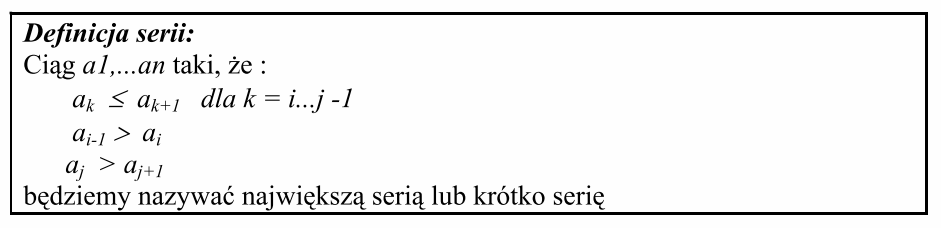
Jako serię traktujemy ciąg rosnący liczb naturalnych. Poniżej znajduje się opis algorytmu.
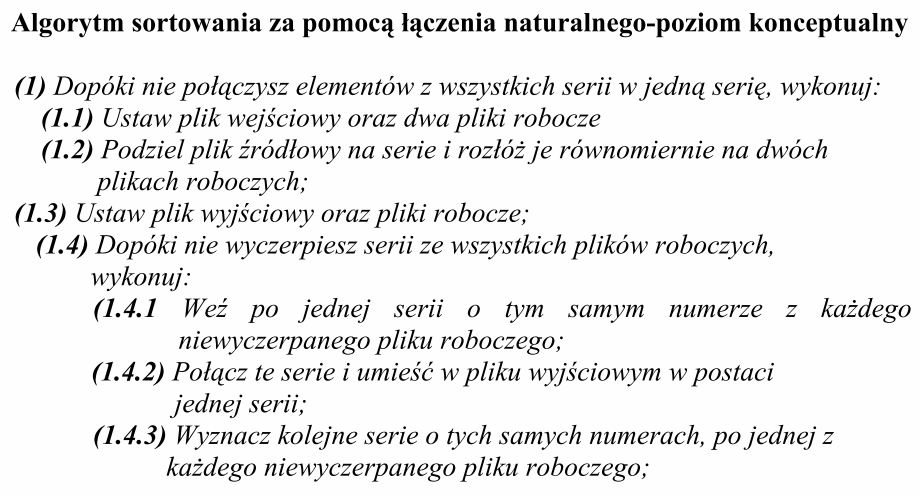

#### Plan działania

W poniższej implementacji algotyrmu sortowania poprzez scalanie serii naturalnych, zamiast używać dwóch tablic (list), które imitowałyby 2 pliki robocze oraz tablicy, odpowiadającej plikowi wyjścia, skorzystamy z kolejki (zaimplementowanej, przy pomocy listy jednokierunkowej). Dopóki w kolejce będzie 2 lub więcej elementów, będziemy przeprowadzać operacje scalania.

##### Funkcja testująca poprawność algorytmu

In [1]:
import random

def test_sort(sorting_fn, *, samples=20, in_place=True, failed_only=False):
    passed = 0
    for i in range(samples):
        random_lst = [random.randint(-100, 100) for _ in range(random.randint(0, 50))]
        random_lst_before = random_lst[:]
        expected = sorted(random_lst)
        output = sorting_fn(random_lst)
        if not in_place:
            random_lst = output
        is_correct = random_lst == expected
        passed += is_correct
        if not failed_only or (failed_only and not is_correct):
            print(f'TEST #{i+1}:')
            print(f'Before sorting: {random_lst}')
            print(f'After sorting: {random_lst}')
            print(f'Expected result: {expected}')
            print(f'Test {"PASSED" if is_correct else "FAILED"}')
            print(f'Current passed-to-tested ratio: {passed}/{i+1}')
            print()
    print(f'Sorting algorithms is {"correct" if passed == samples else "wrong"}')
    print(f'Passed tests in total: {passed}/{samples}')

### Implementacja struktury (kolejki)

In [2]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        
        
class Queue:
    def __init__(self, values=None):
        self.head = self.tail = None
        self.length = 0
        if values: self.enqueue_many(values)
            
    def __len__(self):
        return self.length
            
    def __iter__(self):
        curr = self.head
        while curr:
            yield curr.val
            curr = curr.next
            
    def __str__(self):
        # Arrows starts fromthe first element of the queue and are facing the last item
        return ' -> '.join(str(v) for v in self)
    
    def enqueue(self, val):
        node = Node(val)
        if not self:
            self.head = self.tail = node
        else:
            self.tail.next = node
            self.tail = node
        self.length += 1
        
    def enqueue_many(self, values):
        for val in values:
            self.enqueue(val)
        
    def dequeue(self):
        if not self:
            raise IndexError(f'dequeue from empty {self.__class__.__name__}')
        removed = self.head.val
        if len(self) == 1:
            self.head = self.tail = None
        else:
            self.head = self.head.next
        self.length -= 1
        return removed

### Implementacja algorytmu

In [3]:
def merge_series_sort(arr):
    series_queue = create_series_queue(arr)
    
    while len(series_queue) >= 2:
        series1 = series_queue.dequeue()
        series2 = series_queue.dequeue()
        series_queue.enqueue(merge_series(series1, series2))
        
    return series_queue.dequeue()

    
def create_series_queue(arr):
    if len(arr) <= 1: return Queue([arr])
    
    res = Queue()
    curr = [arr[0]]
    for i in range(1, len(arr)):
        if arr[i] >= curr[-1]:
            curr.append(arr[i])
        else:
            res.enqueue(curr)
            curr = [arr[i]]
    
    if curr: res.enqueue(curr)
    
    return res


def merge_series(series1, series2):
    merged = []
    i = j = 0
    
    while i < len(series1) and j < len(series2):
        if series1[i] < series2[j]:
            merged.append(series1[i])
            i += 1
        else:
            merged.append(series2[j])
            j += 1
            
    for i in range(i, len(series1)):
        merged.append(series1[i])
        
    for j in range(j, len(series2)):
        merged.append(series2[j])
        
    return merged

###### Kilka testów

In [4]:
test_sort(merge_series_sort, samples=100, in_place=False)

TEST #1:
Before sorting: [-93, -83, -77, -73, -72, -70, -70, -65, -64, -60, -58, -53, -44, -41, -26, -18, -18, -18, -13, -9, 1, 4, 5, 8, 9, 17, 21, 21, 24, 31, 32, 32, 39, 40, 49, 50, 59, 60, 62, 63, 65, 66, 83, 86, 90, 91, 91, 96, 99]
After sorting: [-93, -83, -77, -73, -72, -70, -70, -65, -64, -60, -58, -53, -44, -41, -26, -18, -18, -18, -13, -9, 1, 4, 5, 8, 9, 17, 21, 21, 24, 31, 32, 32, 39, 40, 49, 50, 59, 60, 62, 63, 65, 66, 83, 86, 90, 91, 91, 96, 99]
Expected result: [-93, -83, -77, -73, -72, -70, -70, -65, -64, -60, -58, -53, -44, -41, -26, -18, -18, -18, -13, -9, 1, 4, 5, 8, 9, 17, 21, 21, 24, 31, 32, 32, 39, 40, 49, 50, 59, 60, 62, 63, 65, 66, 83, 86, 90, 91, 91, 96, 99]
Test PASSED
Current passed-to-tested ratio: 1/1

TEST #2:
Before sorting: [-99, -96, -81, -74, -61, -42, -41, -33, -22, -5, 16, 25, 25, 42, 66, 84, 92, 98, 99]
After sorting: [-99, -96, -81, -74, -61, -42, -41, -33, -22, -5, 16, 25, 25, 42, 66, 84, 92, 98, 99]
Expected result: [-99, -96, -81, -74, -61, -42, -